# Feature Selection

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)


## Read Data

In [7]:
# Load the CSV file
df = pd.read_csv('../data/processed/HRDataset_p_v1.csv')

# Display the first few rows of the dataset
df.head()

,EmpID,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial
0,10026,1,4,0,62506,0,production technician i,ma,1960,1983-07-10,single,us citizen,no,white,2011-07-05,NaN,NaN,active,production,michael albert,linkedin,4.60,5,0,2019-01-17,0,1,0
1,10084,1,3,0,104437,1,sr. dba,ma,2148,1975-05-05,married,us citizen,no,white,2015-03-30,2016-06-16,career change,voluntarily terminated,it/is,simon roup,indeed,4.96,3,6,2016-02-24,0,17,0
2,10196,0,3,0,64955,1,production technician ii,ma,1810,1988-09-19,married,us citizen,no,white,2011-07-05,2012-09-24,hours,voluntarily terminated,production,kissy sullivan,linkedin,3.02,3,0,2012-05-15,0,3,0
3,10088,0,3,0,64991,0,production technician i,ma,1886,1988-09-27,married,us citizen,no,white,2008-01-07,NaN,NaN,active,production,elijiah gray,indeed,4.84,5,0,2019-01-03,0,15,0
4,10069,0,3,0,50825,1,production technician i,ma,2169,1989-09-08,divorced,us citizen,no,white,2011-07-11,2016-09-06,return to school,voluntarily terminated,production,webster butler,google search,5.00,4,0,2016-02-01,0,2,0


## Features to Add 
- Number of colleagues (employees under the same manager)
- Age (difference between DOB and LastPerformanceReview_Date then we can drop both dates)
- Employment year
- Employment moth

**Feature added previously: 'Managerial'**

### Age

In [8]:
# age
df['Age'] = np.floor((pd.to_datetime(df['LastPerformanceReview_Date']) - pd.to_datetime(df['DOB'])).dt.days / 360)
df['Age']

0      36.0
1      41.0
2      23.0
3      30.0
4      26.0
       ... 
306    34.0
307    33.0
308    40.0
309    40.0
310    41.0
Name: Age, Length: 311, dtype: float64

In [9]:
df.sort_values('Age').head()

,EmpID,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial,Age
112,10300,1,1,1,68898,1,production technician ii,ma,2128,2064-10-12,married,us citizen,no,black or african american,2010-04-26,2011-05-30,career change,voluntarily terminated,production,brannon miller,diversity job fair,3.00,3,0,2011-03-06,3,10,0,-55.0
185,10128,0,3,1,62659,1,production technician i,ma,1760,2068-05-30,single,us citizen,no,black or african american,2012-04-02,2016-11-11,another position,voluntarily terminated,production,kelley spirea,diversity job fair,4.18,4,0,2016-02-05,0,17,0,-54.0
24,10267,0,3,0,57815,1,production technician ii,ma,2210,2067-01-16,single,us citizen,no,white,2011-01-10,2014-04-04,career change,voluntarily terminated,production,elijiah gray,google search,4.80,5,0,2014-03-04,0,5,0,-54.0
32,10188,0,3,0,74326,1,area sales manager,other,21851,2064-06-01,married,eligible noncitizen,no,black or african american,2011-08-15,2014-08-02,another position,voluntarily terminated,sales,john smith,google search,3.14,5,0,2013-02-10,1,19,1,-53.0
301,10048,1,3,0,55140,1,production technician i,ma,2324,2065-09-09,married,eligible noncitizen,no,white,2011-05-16,2015-09-07,unhappy,voluntarily terminated,production,amy dunn,website,5.00,3,0,2015-02-15,0,7,0,-52.0


Quick dirty code to fix the DOB issue [source](https://stackoverflow.com/a/47243438)

In [10]:
from datetime import timedelta, date
col = 'DOB'
df[col] = pd.to_datetime(df[col])
future = df[col].dt.date > date(year=2010,month=1,day=1)
df.loc[future, col] -= timedelta(days=365.25*100)
# re-calculate the age 
df['Age'] = np.floor((pd.to_datetime(df['LastPerformanceReview_Date']) - pd.to_datetime(df['DOB'])).dt.days / 360)

In [11]:
df.sort_values('Age').head(10)

,EmpID,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial,Age
28,10177,0,3,0,53492,1,production technician i,ma,1701,1990-08-24,married,us citizen,no,white,2012-04-02,2013-06-15,another position,voluntarily terminated,production,david stanley,google search,3.35,4,0,2013-03-04,0,6,0,22.0
147,10244,0,3,0,68999,1,sales manager,other,19444,1989-11-11,single,us citizen,no,white,2011-11-07,2014-04-24,maternity leave - did not return,voluntarily terminated,sales,debra houlihan,google search,4.50,5,0,2013-03-30,0,2,1,23.0
2,10196,0,3,0,64955,1,production technician ii,ma,1810,1988-09-19,married,us citizen,no,white,2011-07-05,2012-09-24,hours,voluntarily terminated,production,kissy sullivan,linkedin,3.02,3,0,2012-05-15,0,3,0,23.0
198,10215,1,3,1,50470,1,production technician i,ma,2110,1989-05-02,single,us citizen,no,black or african american,2011-09-26,2014-04-04,return to school,voluntarily terminated,production,webster butler,diversity job fair,4.30,3,0,2013-03-02,0,19,0,24.0
221,10050,1,3,0,64724,1,production technician i,ma,2451,1988-03-06,married,us citizen,no,asian,2011-07-05,2012-11-30,more money,voluntarily terminated,production,brannon miller,google search,5.00,3,0,2012-02-20,0,13,0,24.0
86,10290,0,2,0,99280,1,software engineer,ma,1749,1987-05-15,married,us citizen,no,black or african american,2011-05-02,2013-06-05,attendance,terminated for cause,software engineering,alex sweetwater,indeed,2.10,5,4,2012-08-10,4,19,0,25.0
178,10073,0,3,0,68407,1,production technician ii,ma,2176,1986-12-10,married,us citizen,no,NaN,2011-07-05,2012-08-19,another position,voluntarily terminated,production,amy dunn,linkedin,5.00,4,0,2012-07-02,0,16,0,25.0
80,10064,0,3,0,60070,1,production technician i,ma,2343,1991-09-05,married,us citizen,no,white,2011-04-04,2017-06-06,military,voluntarily terminated,production,kissy sullivan,google search,5.00,3,0,2017-04-09,0,7,0,25.0
215,10297,0,2,0,60270,1,production technician ii,ma,2472,1989-07-18,married,us citizen,no,asian,2011-07-05,2015-09-15,unhappy,voluntarily terminated,production,amy dunn,careerbuilder,2.40,5,0,2015-02-06,5,2,0,25.0
189,10213,1,3,0,58207,0,production technician ii,ma,1450,1992-08-17,married,us citizen,no,white,2011-11-07,NaN,NaN,active,production,david stanley,linkedin,3.70,3,0,2019-01-08,0,14,0,26.0


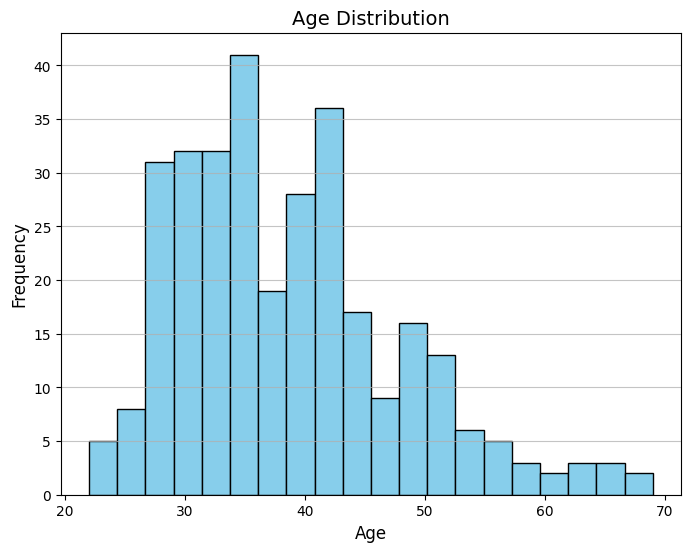

In [15]:
# Visualize the distribution of the age
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

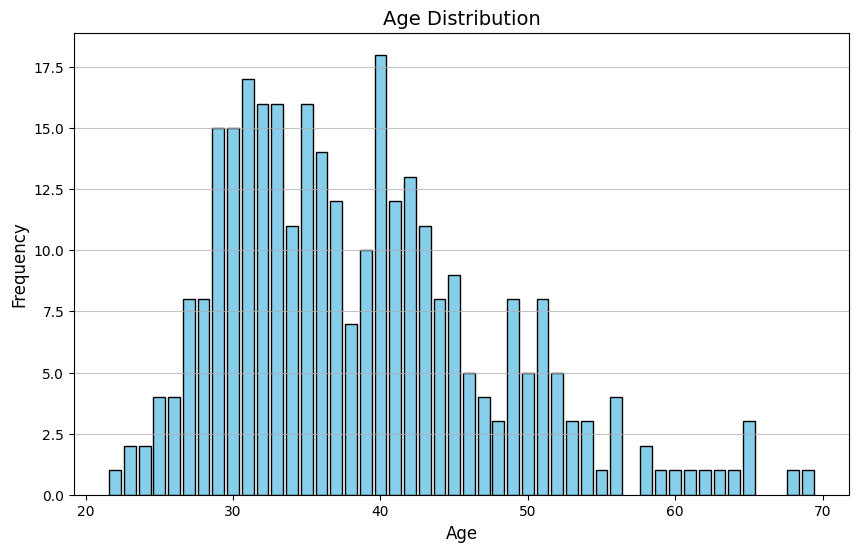

In [17]:
# Count the frequency of each unique age
age_counts = df['Age'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()

### Partition employment date 

In [18]:
df.sample()

,EmpID,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Managerial,Age
169,10137,1,3,0,63450,0,production technician ii,ma,1770,1979-03-19,married,us citizen,no,white,2013-07-08,NaN,NaN,active,production,kelley spirea,linkedin,4.0,3,0,2019-02-18,0,7,0,40.0


In [19]:
df['HireYear'] = pd.to_datetime(df['DateofHire']).dt.year
df['HireMonth'] = pd.to_datetime(df['DateofHire']).dt.month

### Number of colleagues

In [20]:
df['NumberOfColleagues'] = 0
for manager, group in df.groupby('ManagerName'):
    df.loc[df['ManagerName'] == manager, 'NumberOfColleagues'] = len(group) - 1

In [21]:
# checkpoint
df.to_csv('../data/processed/HRDataset_p_v2_more_features.csv')

## Features to Discard
- Terminated employees ['Termd', 'TermReason', 'DateofTermination', 'EmploymentStatus']. Why? In practice, we will always want to predict the performance score of candidates, new joiners, or active employees. Thus, it does not make sense to consider terminated employees.
- Zip
- 'Position' Why? A. It is highly dimensional and B. the department and salary are sufficient features to indicate the same information
- 'DateofHire', it will be separated into two features as mentioned above. 
- 'DOB' and 'LastPerformanceReview_Date' since we used these columns to calculate the age.

In [22]:
df.drop(columns=['Termd', 'TermReason', 'DateofTermination', 
                 'EmploymentStatus', 'Zip', 'Position', 'DateofHire',
                 'DOB', 'LastPerformanceReview_Date'], inplace=True)
df.head()

,EmpID,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,State,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Managerial,Age,HireYear,HireMonth,NumberOfColleagues
0,10026,1,4,0,62506,ma,single,us citizen,no,white,production,michael albert,linkedin,4.60,5,0,0,1,0,36.0,2011,7,21
1,10084,1,3,0,104437,ma,married,us citizen,no,white,it/is,simon roup,indeed,4.96,3,6,0,17,0,41.0,2015,3,16
2,10196,0,3,0,64955,ma,married,us citizen,no,white,production,kissy sullivan,linkedin,3.02,3,0,0,3,0,23.0,2011,7,21
3,10088,0,3,0,64991,ma,married,us citizen,no,white,production,elijiah gray,indeed,4.84,5,0,0,15,0,30.0,2008,1,21
4,10069,0,3,0,50825,ma,divorced,us citizen,no,white,production,webster butler,google search,5.00,4,0,0,2,0,26.0,2011,7,20


In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 RaceDesc    15
dtype: int64


In [24]:
df[df['RaceDesc'].isna()]

,EmpID,GenderID,PerfScoreID,FromDiversityJobFairID,Salary,State,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,Department,ManagerName,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Managerial,Age,HireYear,HireMonth,NumberOfColleagues
13,10265,1,3,0,58709,ma,single,us citizen,no,NaN,production,kelley spirea,google search,4.60,4,0,0,7,0,36.0,2012,2,21
63,10143,1,3,0,56294,ma,single,eligible noncitizen,no,NaN,production,kissy sullivan,linkedin,3.96,4,0,0,6,0,40.0,2011,11,21
67,10306,1,1,0,61568,other,single,us citizen,no,NaN,sales,john smith,indeed,1.93,3,0,6,5,1,43.0,2014,9,13
106,10018,0,4,0,57815,ma,single,us citizen,yes,NaN,production,amy dunn,indeed,3.90,4,0,0,3,0,39.0,2014,9,20
116,10218,0,3,0,66149,ma,separated,us citizen,no,NaN,production,kissy sullivan,google search,4.40,5,0,0,1,0,35.0,2013,9,21
121,10109,1,3,0,71707,other,single,us citizen,no,NaN,sales,john smith,linkedin,4.50,5,0,0,20,1,44.0,2012,3,13
128,10167,1,3,0,70545,other,married,us citizen,no,NaN,sales,john smith,indeed,3.60,5,0,0,9,1,30.0,2014,8,13
141,10009,0,4,0,60724,ma,divorced,us citizen,no,NaN,production,ketsia liebig,linkedin,4.60,4,0,0,11,0,32.0,2011,7,20
178,10073,0,3,0,68407,ma,married,us citizen,no,NaN,production,amy dunn,linkedin,5.00,4,0,0,16,0,25.0,2011,7,20
184,10202,1,3,0,63291,other,married,us citizen,no,NaN,sales,lynn daneault,website,3.40,4,0,0,7,1,35.0,2016,7,12


In [25]:
# checkpoint 
df.to_csv('../data/processed/HRDataset_p_v3_selected_features.csv', index=False)

## Correlation

In [26]:
numeric_features = [
    'Salary',
    'EngagementSurvey',
    'EmpSatisfaction',
    'SpecialProjectsCount',
    'DaysLateLast30',
    'Absences',
    'Age',
    'NumberOfColleagues',
    'PerfScoreID'
]
# label = 'PerfScoreID'

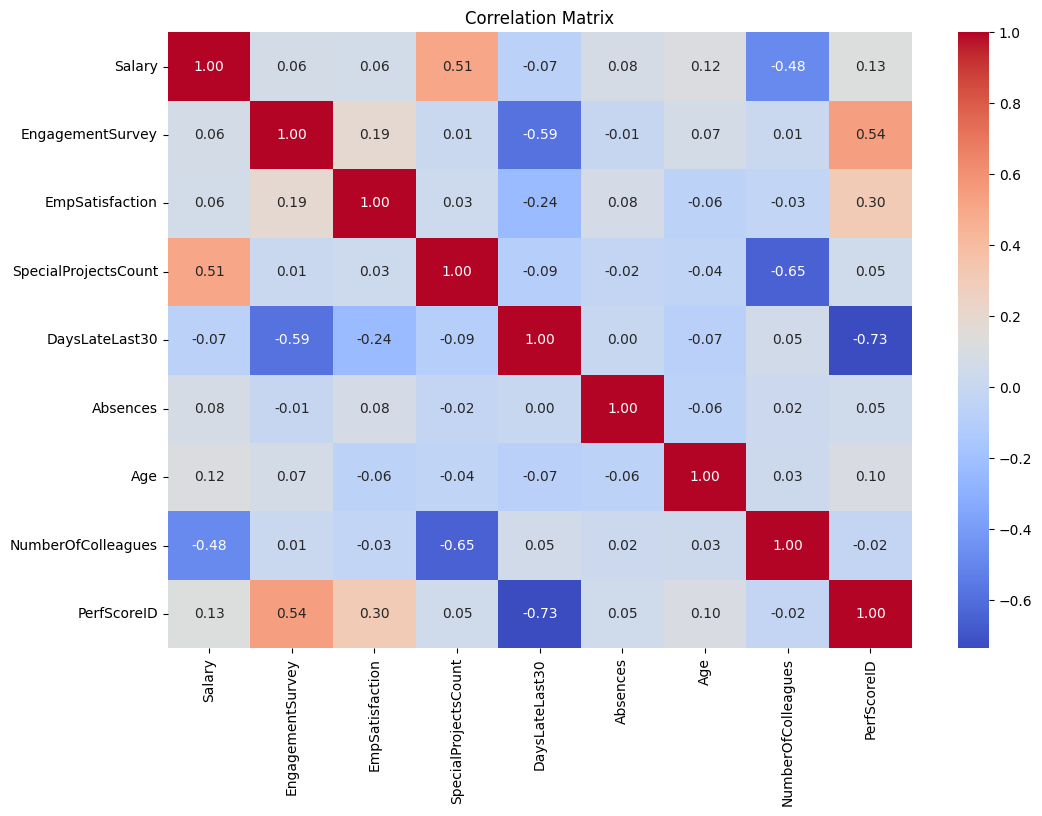

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Note that the performance score 'PerfScoreID' has a relatively high correlation with engagement survey results and the employee's satisfaction. 